# smile()函数

定义一个从smiles字符串显示分子结构的函数

In [1]:
def smile(smi="c1ccccc1", make3d=False, svg=True, filename=None):
    """以svg的格式显示smiles结构,以png的格式保存smiles结构"""

    # 读取smi字符串
    mol = readstring("smiles", smi)

    # 三维投影显示,影响filename, 影响svg?png
    if make3d:
        mol.make3D()
    # 创建文件,并不是函数的返回值
    if filename != None:
        mol.draw(show=False, filename=filename)
        print("file @{}>> also has been saved.".format(filename))

    # 显示svg?png,只能返回一个
    if svg == True:
        svg = SVG(mol.write("svg"))
        return svg
    else:
        return mol

测试smile()

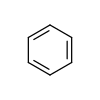

In [2]:
smile(svg=0)

# baidu-smiles

**InChI**: 国际化合物标识(International Chemical Identifier), 具有唯一性;  
**SMILES**: 简化分子线性输入规范(Simplified molecular input line entry specification);

## smile规则

有机物中的C, N, O, P, S, Br, Cl, I等原子可以省略方括号, 其他元素必须包括在方括号之内;

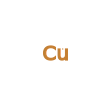

In [3]:
smile('[Cu]',svg=0)

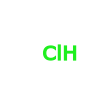

In [4]:
smile('Cl',svg=0)

氢原子常被省略

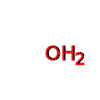

In [5]:
smile('O',svg=0)

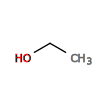

In [6]:
smile('CCO',svg=0)

双键用`=`表示, 三键用`#`表示

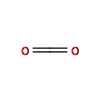

In [7]:
# 含有双键的CO2
smile('O=C=O',svg=0)

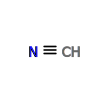

In [8]:
# 含有三键的氰化氢
smile('C#N',svg=0)

如果结构中有环, 则要打开, 断开处的两个原子用同一个数字标记, 表示原子间有键相连

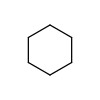

In [9]:
# 环己烷
smile('C1CCCCC1',svg=0)

芳环中的C,O,S,N原子分别用小写字母c,o,s,n表示

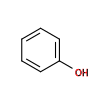

In [10]:
smile('c1ccccc1(O)',svg=0)

碳链上的分支用圆括号表示

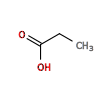

In [11]:
# 丙酸
smile('CCC(=O)O',svg=0)

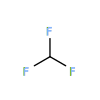

In [12]:
# 三氟甲烷
smile('FC(F)F',svg=0)

异构SMILES可以指定分子的手性

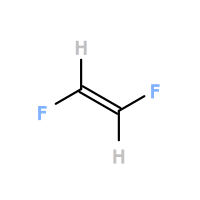

In [13]:
smile('F/C=C/F',make3d=1)

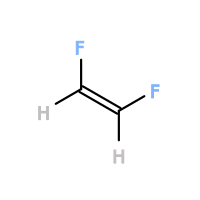

In [14]:
smile('F/C=C\F',make3d=1)

# wikipedia-smiles

[wiki-smiles](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system)

## Atoms

`[]`内只能包含三类信息: [单元素符号, 电荷及其数目, H及其数目];  
除了H外一个`[]`只能放置一个原子;  
时刻注意H(或其他原子)必须放置在`[]`内, 且不能出现在其他元素前面;

In [15]:
try: smile('OH2') 
except OSError as e:
    print(e)

Failed to convert 'OH2' to format 'smiles'


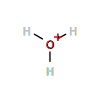

In [16]:
smile('[OH3+]',svg=0)

`+++`可表示为`+3`, 而不是`3+`

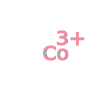

In [17]:
smile('[Co+3]',svg=0)

## Bonds

与键相关的符号: ` ., -, =, #, $, :, /, \`;

`-`: 单键, 可省略;  
`-, =, #, $`: 分别表示单键双键三键四键(quadruple);

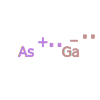

In [18]:
smile('[Ga-]$[As+]',svg=0)

`.`: 非键(non-bond), 表示两部分之间没有成键

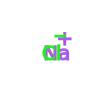

In [19]:
smile('[Na+].[Cl-]',svg=0)# dissociation.

`:`: 3/2键(one and a half), 苯中的键

`/  or  \`双键附近的构型

## Rings

环形结构需要在环的任意一点(最好是带长支链的点)开环, 并设置闭环标签(ring closure labels);  
**数字其实表示半键**;  
第一次出现的数字, 标记了`链头原子`, 第二次出现的数字标记了`链尾原子`, **将链头和链尾的原子连接起来**就会形成环结构;  

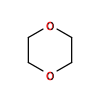

In [20]:
# 二恶烷
smile('O1CCOCC1',svg=0) #第一个O是链头, 最后一个C是链尾, 数字1表示半键;

十氢化萘表示法1: 单独画两个环;

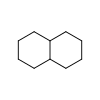

In [21]:
smile('C1CCCC2C1CCCC2',svg=0) #C1和C1之间连接, C2和C2之间连接, 第一个C2出现在C1之前

十氢化萘的画法2: 先画最外围的链条, 闭合成大环, 再连接一个小环;

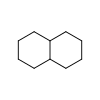

In [22]:
smile('C1CCCC2CCCCC12',svg=0) #C1:第一条链的链头, C2:第二条链的链头, C12所有链的链尾;

数字12表示的是两个数字(链1和链2), 如果需要两位数的环号(two-digit ring numbers, 数字12表示链12), 请在12前面加上[%](#site1)

## Aromaticity

芳香环(Aromatic)有三种表示方法:
1. Kekulé形式, 使用交替的单键和双键: `C1=CC=CC=C1`;
2. 使用芳香键的符号`:`: `C:1:C:C:C:C:C1`;
3. 将`B, C, N, O, P, S`原子全都改为小写形式(lower-case)`b, c, n, o, p, s`

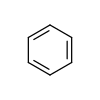

In [23]:
smile('C1=CC=CC=C1',svg=0)

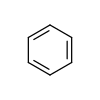

In [24]:
smile('C:1:C:C:C:C:C1',svg=0)

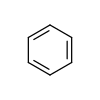

In [25]:
smile('c:1:c:c:c:c:c1',svg=0)

`吡啶`(pyridine)

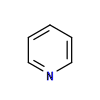

In [26]:
smile('n1ccccc1',svg=0)

`呋喃`(furan)

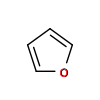

In [27]:
smile('o1cccc1',svg=0)

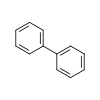

In [28]:
smile('c1ccccc1-c2ccccc2',svg=0)
# smile('c1ccccc1c2ccccc2',svg=0)

在吡咯(pyrrole)中发现的与氢键合的芳族氮必须表示为[nH],小写N

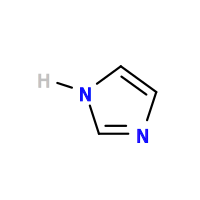

In [29]:
#imidazole 
smile('n1c[nH]cc1')

## 分支

分支使用`()`表示

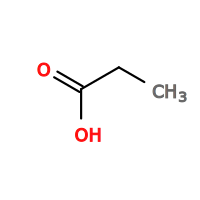

In [30]:
# 丙酸
smile('CCC(=O)O')

开环后尽可能的避免出现`()`

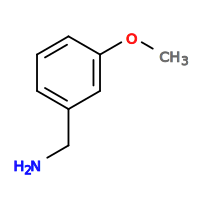

In [31]:
# 3-氰基茴香醚
smile('COc(c1)cccc1C＃N')

甲苯通常写为Cc1ccccc1或c1ccccc1C, 如果写成c1ccc(C)ccc1或c1ccc(ccc1)C, 则避免使用所需的括号;

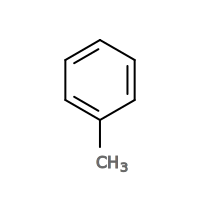

In [32]:
smile('Cc1ccccc1') #smile('c1cc(C)ccc1')避免

##  立体化学(Stereochemistry)

### 顺反异构

`F/C=C/F`: 两个F都与C成上斜式连接, 两个F位于双键的不同侧;   
`F/C=C\F`: 第一个F与C成上斜连接, 第二个F与C成下斜连接, 两个F位于双键的同一侧; 

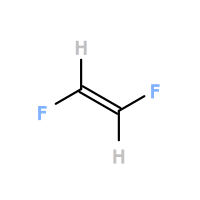

In [33]:
smile('F/C=C/F',make3d=1)

交叉键表示有可能出现异构

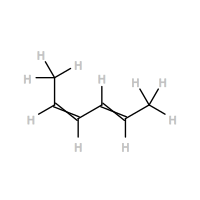

In [34]:
smile('CC=CC=CC',make3d=1)

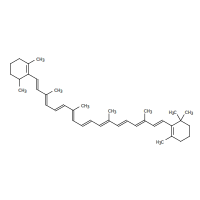

In [35]:
#  beta-carotene 
smi = 'CC1CCC/C(C)=C1/C=C/C(C)=C/C=C/C(C)=C/C=C/C=C(C)/C=C/C=C(C)/C=C/C2=C(C)/CCCC2(C)C'
smile(smi)

### 对映异构

`@`, 从第一个键的方向(第一个原子和中心C的方向)看过去, 随后出现的三个原子按逆时针(counter-clockwise)方向排列;   
`@@`表示按顺时针方向排列; 

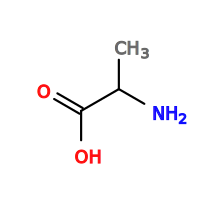

In [36]:
# 省略了一个重要的C-H键
smile('NC(C)C(=O)O')

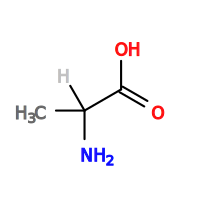

In [37]:
# 突出四面体构型中的CH键
smile('N[CH](C)C(=O)O')

从NC键看过去, H,甲基,酸按顺时针排列

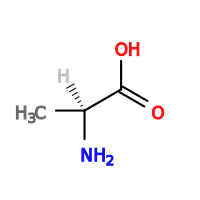

In [38]:
smile('N[C@@H](C)C(=O)O')

从NC键的方向看过去, H, 甲基, 酸按逆时针方向排列

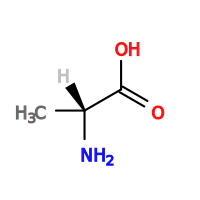

In [39]:
smile('N[C@H](C)C(=O)O')
# smile('N[C@]([H])(C)C(=O)O')

调换字符的排列顺序

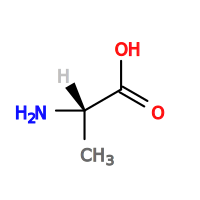

In [40]:
smile('C[C@H](N)C(=O)O')

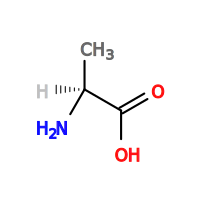

In [41]:
smile('OC(=O)[C@@H](N)C')

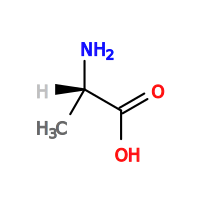

In [42]:
smile('OC(=O)[C@H](C)N') #从酸C键的方向看过去,逆时针出现H,甲基,N

从手性碳位于字符串的开头如何分析:  
手部做三维坐标状, 手部顶点表示中心C, 其余三指表示三个键, 三指扣在纸面上时, H出现在纸面内部, 所以沿着C-H键方向, 逆时针出现C,N,COOH;

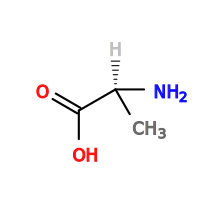

In [43]:
smile('[C@@H](C)(N)C(=O)O')

## Isotopes

芳香环中有个C14

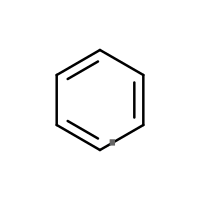

In [44]:
smile('[14c]1ccccc1')

四氯化碳中有一个H2

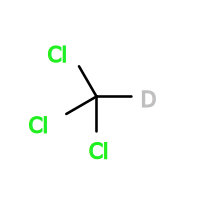

In [45]:
smile('[2H]C(Cl)(Cl)Cl')

## Examples

Copper(II) sulfate: $Cu^{2+}SO_4^{2-}$

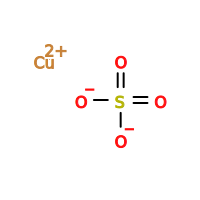

In [46]:
smile('[Cu+2].[O-]S(=O)(=O)[O-]')

Vanillin: ![Vanillin](https://upload.wikimedia.org/wikipedia/commons/thumb/2/29/Vanillin.svg/105px-Vanillin.svg.png) 

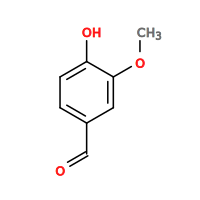

In [47]:
smile('O=Cc1ccc(O)c(OC)c1')
     # OCc1cc(C=O)ccc1O

Melatonin: ![Melatonin](https://upload.wikimedia.org/wikipedia/commons/thumb/1/14/Melatonin2.svg/240px-Melatonin2.svg.png) 

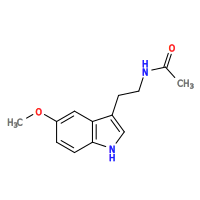

In [48]:
smile('CC(=O)NCCC1=CNc2c1cc(OC)cc2')
     # CC(=O)NCCc1c[nH]c2ccc(OC)cc12

Flavopereirin: ![Flavopereirin](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/Flavopereirine.svg/240px-Flavopereirine.svg.png)

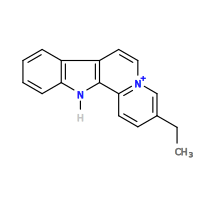

In [49]:
smile('CCc(c1)ccc2[n+]1ccc3c2[nH]c4c3cccc4') 
      #CCc1c[n+]2ccc3c4ccccc4[nH]c3c2cc1

Nicotine: ![Nicotine](https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/Nicotine.svg/120px-Nicotine.svg.png)

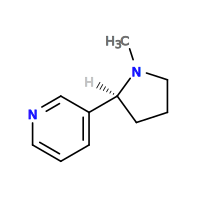

In [50]:
smile('CN1CCC[C@H]1c2cccnc2')  

Oenanthotoxin: ![Oenanthotoxin](https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/Oenanthotoxin-structure.png/270px-Oenanthotoxin-structure.png)

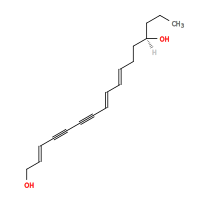

In [51]:
smile('CCC[C@@H](O)CC\C=C\C=C\C#CC#C\C=C\CO') 
      #CCC[C@@H](O)CC/C=C/C=C/C#CC#C/C=C/CO  

Pyrethrin II: ![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Pyrethrin-II-2D-skeletal.svg/270px-Pyrethrin-II-2D-skeletal.svg.png)

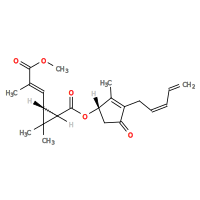

In [52]:
smile('CC1=C(C(=O)C[C@@H]1OC(=O)[C@@H]2[C@H](C2(C)C)/C=C(\C)/C(=O)OC)C/C=C\C=C',svg=1)

Aflatoxin: ![afl](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7f/Aflatoxin_B1.svg/195px-Aflatoxin_B1.svg.png)

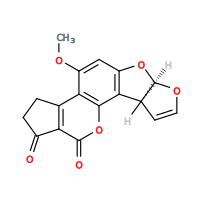

In [53]:
smile('O1C=C[C@H]([C@H]1O2)c3c2cc(OC)c4c3OC(=O)C5=C4CCC(=O)5')

Glucose: ![glu](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Beta-D-Glucose.svg/210px-Beta-D-Glucose.svg.png)

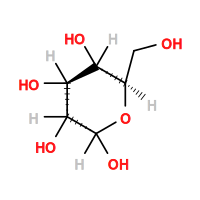

In [54]:
smile('OC[C@@H](O1)[C@@H](O)[C@H](O)[C@@H](O)[C@@H](O)1')

Bergenin: ![ber](https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Cuscutine.svg/195px-Cuscutine.svg.png)

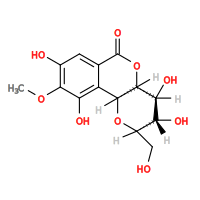

In [55]:
smile('OC[C@@H](O1)[C@@H](O)[C@H](O)[C@@H]2[C@@H]1c3c(O)c(OC)c(O)cc3C(=O)O2')  

pheromone: ![phe](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Pheromone_cochenille_californienne.svg/270px-Pheromone_cochenille_californienne.svg.png)

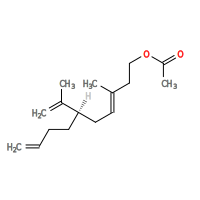

In [56]:
smile('CC(=O)OCCC(/C)=C\C[C@H](C(C)=C)CCC=C')

2S,5R-Chalcogran: ![2s5r](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/2S%2C5R-chalcogran-skeletal.svg/195px-2S%2C5R-chalcogran-skeletal.svg.png)

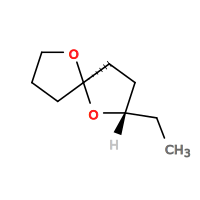

In [57]:
smile('CC[C@H](O1)CC[C@@]12CCCO2')

Alpha-thujone: ![Alpha-thujone](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/Alpha-thujone.svg/150px-Alpha-thujone.svg.png)

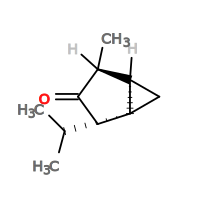

In [58]:
smile('CC(C)[C@@]12C[C@@H]1[C@@H](C)C(=O)C2')

Thiamine: ![Thiamine](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Thiamin.svg/225px-Thiamin.svg.png)

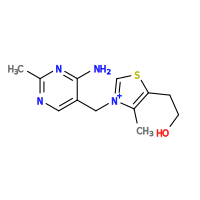

In [59]:
smile('OCCc1c(C)[n+](cs1)Cc2cnc(C)nc2N') 

<span id='site1'>一个超过9个环的分子</span>: ![九](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b8/Cephalostatine-1.svg/540px-Cephalostatine-1.svg.png)

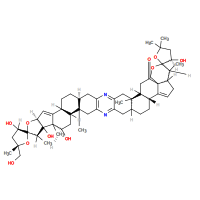

In [60]:
smi='CC(C)(O1)C[C@@H](O)[C@@]1(O2)[C@@H](C)[C@@H]3CC=C4[C@]3(C2)C(=O)C[C@H]5[C@H]4CC[C@@H](C6)[C@]5(C)Cc(n7)c6nc(C[C@@]89(C))c7C[C@@H]8CC[C@@H]%10[C@@H]9C[C@@H](O)[C@@]%11(C)C%10=C[C@H](O%12)[C@]%11(O)[C@H](C)[C@]%12(O%13)[C@H](O)C[C@@]%13(C)CO'
smile(smi)

## Other examples

[Daylight's depict utility provides users with the means to check their own examples of SMILES and is a valuable
educational tool](http://www.daylight.com/dayhtml/doc/theory/theory.smiles.html);